# Linear Regression Project

### Predicting the cost of health insurance for a person

- The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Dataset Shape Analysis

total_data.shape

(1338, 7)

In [4]:
# Dataset Info 

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Identify and Trim Duplicates

if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

In [6]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: ['sex', 'smoker', 'region']
Numerical variables: ['age', 'bmi', 'children', 'charges']


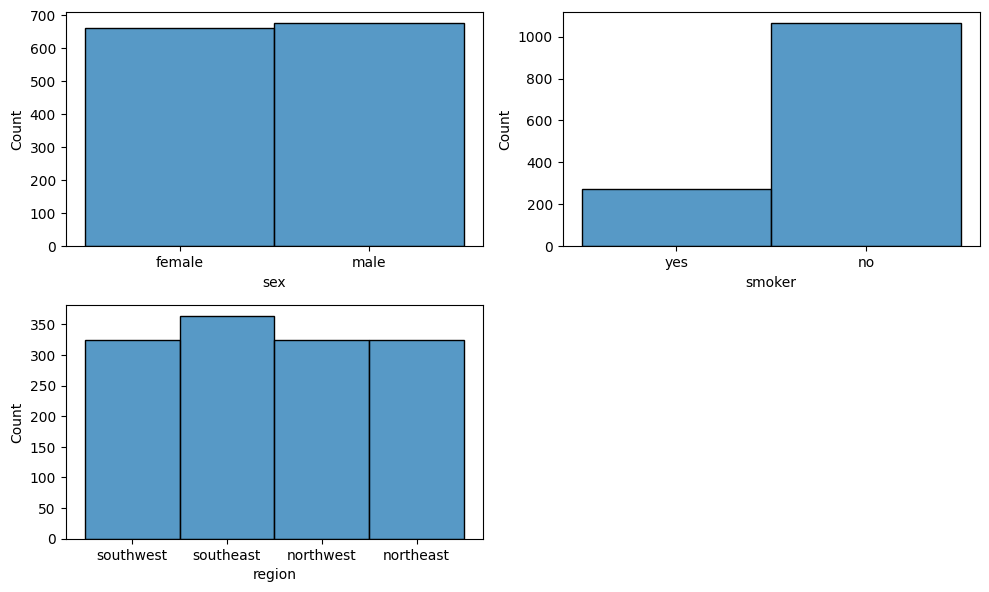

In [10]:
# Univariate Data Analysis

# Categorial Univariate Analysis: ['sex', 'smoker', 'region']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2,2 , figsize = (10,6))

sns.histplot(ax = axes [0,0] , data = total_data , x = 'sex')
sns.histplot(ax = axes [0,1] , data = total_data , x = 'smoker')
sns.histplot(ax = axes [1,0] , data = total_data , x = 'region')
fig.delaxes(axes[1,1])

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Conclusions:

- The categories sex and region are quite homogeneous.
- There are much more people non-smokers compared to smokers.

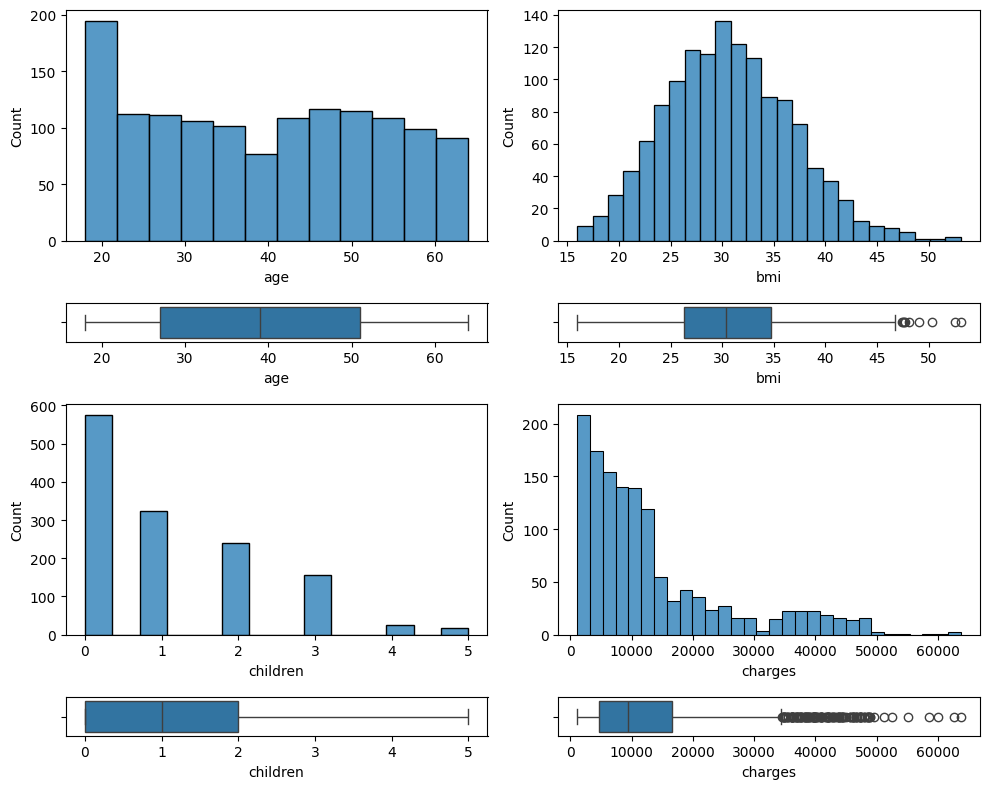

In [16]:
# Univariate Data Analysis

# Numerical Univariate Analysis: ['age', 'bmi', 'children', 'charges']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4,2 , figsize = (10,8), gridspec_kw={'height_ratios' : [6, 1, 6, 1]})

sns.histplot(ax = axes [0,0] , data = total_data , x = 'age')
sns.boxplot(ax = axes [1,0] , data = total_data, x = 'age')
sns.histplot(ax = axes [0,1] , data = total_data , x = 'bmi')
sns.boxplot(ax = axes [1,1] , data = total_data, x = 'bmi')
sns.histplot(ax = axes [2,0] , data = total_data , x = 'children')
sns.boxplot(ax = axes [3,0] , data = total_data, x = 'children')
sns.histplot(ax = axes [2,1] , data = total_data , x = 'charges')
sns.boxplot(ax = axes [3,1] , data = total_data, x = 'charges')

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Conclusions:

- There are more twenty-year-old people and for the rest of ages the distribution is quite uniform.
- The BMI is very close to a normal distribution, except for some outliers.
- The distribution of charges is asymmetric and we need to analyse its outliers with atention. 

Let's take a look into the highest prices to see if they have any special common characteristics.

In [17]:
high_charges =  total_data[total_data['charges'] > 40000]
print(high_charges.shape)
high_charges

(79, 7)


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


In [40]:
average_bmi = total_data['bmi'].mean().round(3)
print('BMI average is:', average_bmi)

BMI average is: 30.663


In [33]:
smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'smoker'].value_counts()['yes']
print('Smokers for outliers values of charge = ' , smoker_outlier)

male_smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'sex'].value_counts()['male']
print('Male smokers for outliers values of charge = ' , male_smoker_outlier)

Smokers for outliers values of charge =  79
Male smokers for outliers values of charge =  47


Conclusions:

- We cannot disconsider the outliers as all the costumers with high charge prices are smokers, the marjority are male sex and with BMI above the average (30.663).

- age - numerical
- sex - categorical
- bmi - numerical
- children - numerical
- smoker - categorical
- region - categorical
- charges --> target - numerical